# Exploratory data analysis
**Describing, visualizing, correlation analysis, hyphothesis testing**

**Import** data from "data/cleaned.csv"

In [1]:
# Setup

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pkg import utils
from pkg import plot

In [2]:
# Importing data

parent = 'data'
filename = 'cleaned.csv'

path = utils.get_path(parent,filename)
df = pd.read_csv(path, index_col=2)


In [3]:
# Runners

run_corr = True
run_pca = False
run_tsne = False

run_freqCluster = True

run_rarity_plot = True
run_amino_plot = True

run_save = True

In [4]:
numericals = df.select_dtypes(include=['number'])
numericals = numericals.columns

categoricals = df.select_dtypes(exclude=['number'])
categoricals = categoricals.columns

In [5]:
print(f"Those data have {df.shape[0]} rows and {df.shape[1]} columns\n")
df.head()

Those data have 13028 rows and 69 columns



,Unnamed: 0,Kingdom,SpeciesID,Ncodons,SpeciesName,UUU,UUC,UUA,UUG,CUU,...,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
DNAtype,,,,,,,,,,,,,,,,,,,,,
0,0,vrl,100217,1995,Epizootic haematopoietic necrosis virus,0.01654,0.01203,0.00050,0.00351,0.01203,...,0.00451,0.01303,0.03559,0.01003,0.04612,0.01203,0.04361,0.00251,0.00050,0.00000
0,1,vrl,100220,1474,Bohle iridovirus,0.02714,0.01357,0.00068,0.00678,0.00407,...,0.00136,0.01696,0.03596,0.01221,0.04545,0.01560,0.04410,0.00271,0.00068,0.00000
0,2,vrl,100755,4862,Sweet potato leaf curl virus,0.01974,0.02180,0.01357,0.01543,0.00782,...,0.00596,0.01974,0.02489,0.03126,0.02036,0.02242,0.02468,0.00391,0.00000,0.00144
0,3,vrl,100880,1915,Northern cereal mosaic virus,0.01775,0.02245,0.01619,0.00992,0.01567,...,0.00366,0.01410,0.01671,0.03760,0.01932,0.03029,0.03446,0.00261,0.00157,0.00000
0,4,vrl,100887,22831,Soil-borne cereal mosaic virus,0.02816,0.01371,0.00767,0.03679,0.01380,...,0.00604,0.01494,0.01734,0.04148,0.02483,0.03359,0.03679,0.00000,0.00044,0.00131


In [6]:
df[numericals].shape

(13028, 67)

In [7]:
df.info()

print(df.columns)

<class 'pandas.core.frame.DataFrame'>
Index: 13028 entries, 0 to 1
Data columns (total 69 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   13028 non-null  int64  
 1   Kingdom      13028 non-null  object 
 2   SpeciesID    13028 non-null  int64  
 3   Ncodons      13028 non-null  int64  
 4   SpeciesName  13028 non-null  object 
 5   UUU          13028 non-null  float64
 6   UUC          13028 non-null  float64
 7   UUA          13028 non-null  float64
 8   UUG          13028 non-null  float64
 9   CUU          13028 non-null  float64
 10  CUC          13028 non-null  float64
 11  CUA          13028 non-null  float64
 12  CUG          13028 non-null  float64
 13  AUU          13028 non-null  float64
 14  AUC          13028 non-null  float64
 15  AUA          13028 non-null  float64
 16  AUG          13028 non-null  float64
 17  GUU          13028 non-null  float64
 18  GUC          13028 non-null  float64
 19  GUA          

In [8]:
df.describe()

codons = numericals[3:]

In [9]:
dict_kingdom = {'arc':'archae',
                'bct':'bacteria',
                'inv':'invertebrates',
                'mam':'mammals',
                'phg':'bacteriophage',
                'plm':'plasmids',
                'pln':'plants',
                'pri':'primates',
                'rod':'rodents',
                'vrl':'virus',
                'vrt':'vertebrates'}


figure saved on  c:\Users\ptons\Code\repositories\codons\reports\codons_corr


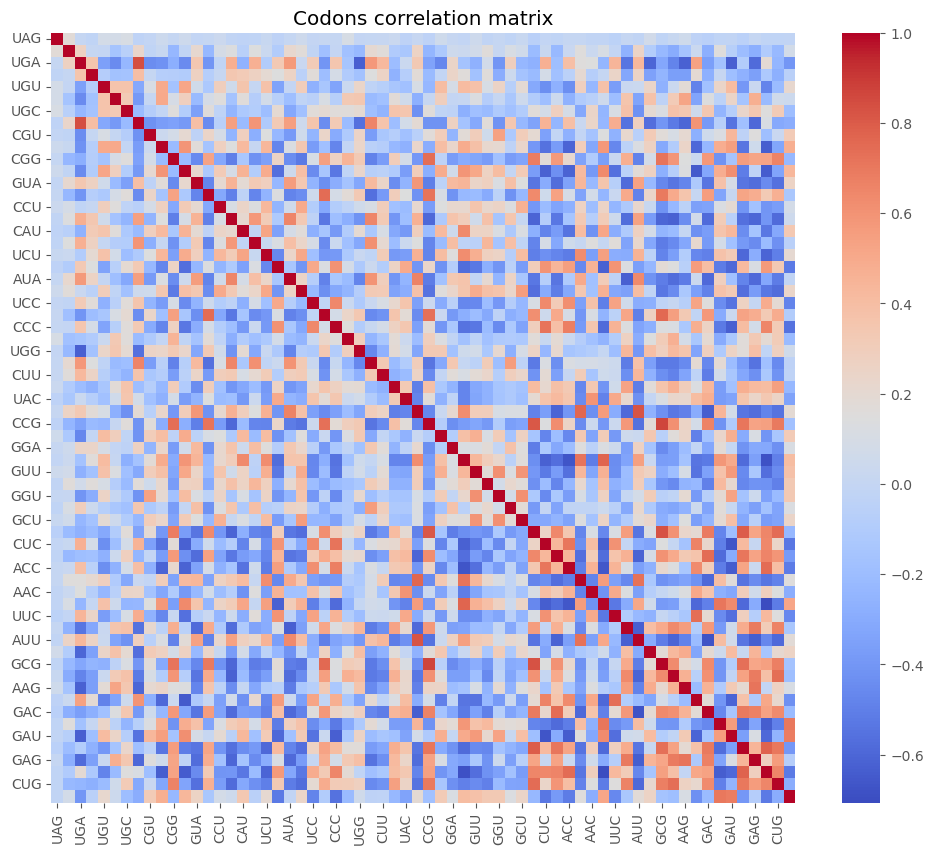

Pair of variables with correlation greater than 0.5:

GCG  CCG    0.869467
CCG  GCG    0.869467
CUA  UGA    0.842416
UGA  CUA    0.842416
CGC  GCG    0.826959
              ...   
UCC  CAC    0.503318
AGA  AGG    0.501930
AGG  AGA    0.501930
UUC  UAC    0.500995
UAC  UUC    0.500995
Length: 334, dtype: float64


In [18]:
if run_corr:

    correlation_matrix = df[codons].corr()
    correlation_matrix

    plot.corr_map(correlation_matrix, title="Codons correlation matrix",  savename="codons_corr")

    corr_threshold = 0.5

    high_correlation_pairs = correlation_matrix[(correlation_matrix > corr_threshold) & (correlation_matrix < 1.0)]
    high_correlation_pairs = high_correlation_pairs.unstack().dropna().sort_values(ascending=False)

    print(f"Pair of variables with correlation greater than {corr_threshold}:\n")
    print(high_correlation_pairs)

    


In [11]:
if run_pca:
    plot.pca_3d(df[codons], multiple_graph=True, savename="codons_pca3d") 

In [12]:
if run_tsne:
    plot.t_sne(df[codons], savename="codons_tsne")

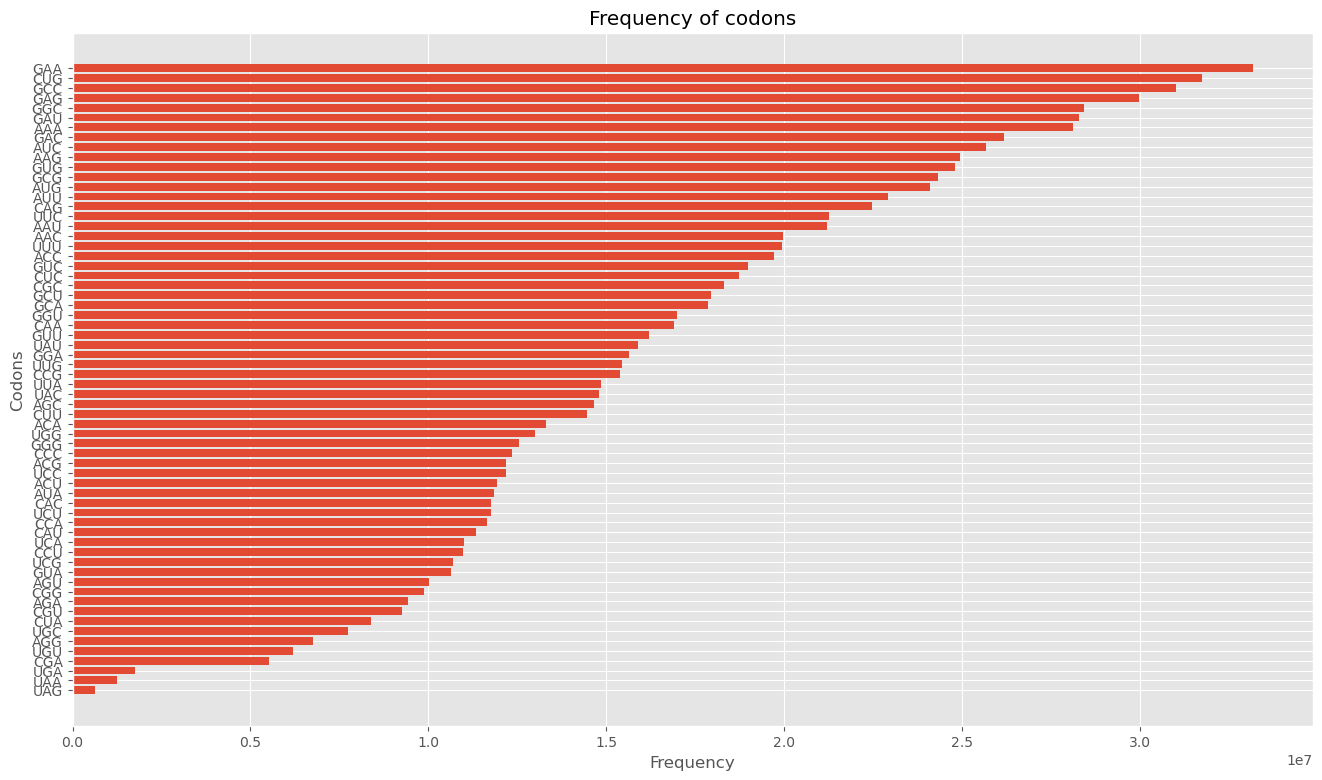

figure saved on  c:\Users\ptons\Code\repositories\codons\reports\freq_codons


In [13]:

codons_dict = {}

for codon in codons:
    codons_dict[codon] = (df[codon]*df["Ncodons"]).sum()

import operator
codons_dict = dict(sorted(codons_dict.items(),key=operator.itemgetter(1)))

codons = list(codons_dict.keys())
value = list(codons_dict.values())

fig, ax = plt.subplots(figsize=(16,9))

ax.barh(codons, value)
plt.xlabel("Frequency")
plt.ylabel("Codons")
plt.title("Frequency of codons")
plt.show()

if run_save :
    plot.save('freq_codons', fig.savefig)

In [14]:
# Creating df freq_clusters

if run_freqCluster:

    k_cluster = 3

    jump = round(100/k_cluster)
    cluster_names = [str(i*jump)+'-'+str(i*jump+jump)+'%' for i in range(k_cluster)]
    clusters = {}

    jump = len(codons)//k_cluster+1

    for i in range(k_cluster):
        index = jump * i
        clusters[i] = codons[index:index+jump]

    for i in clusters:
        df[cluster_names[i]] = df[clusters[i]].sum(axis=1)

    columns = ["Kingdom"] + cluster_names
    cluster_df = df[columns]
    freqCluster_df = cluster_df.groupby("Kingdom").mean()

    freqCluster_df.head()

figure saved on  c:\Users\ptons\Code\repositories\codons\reports\rarity_plot.png


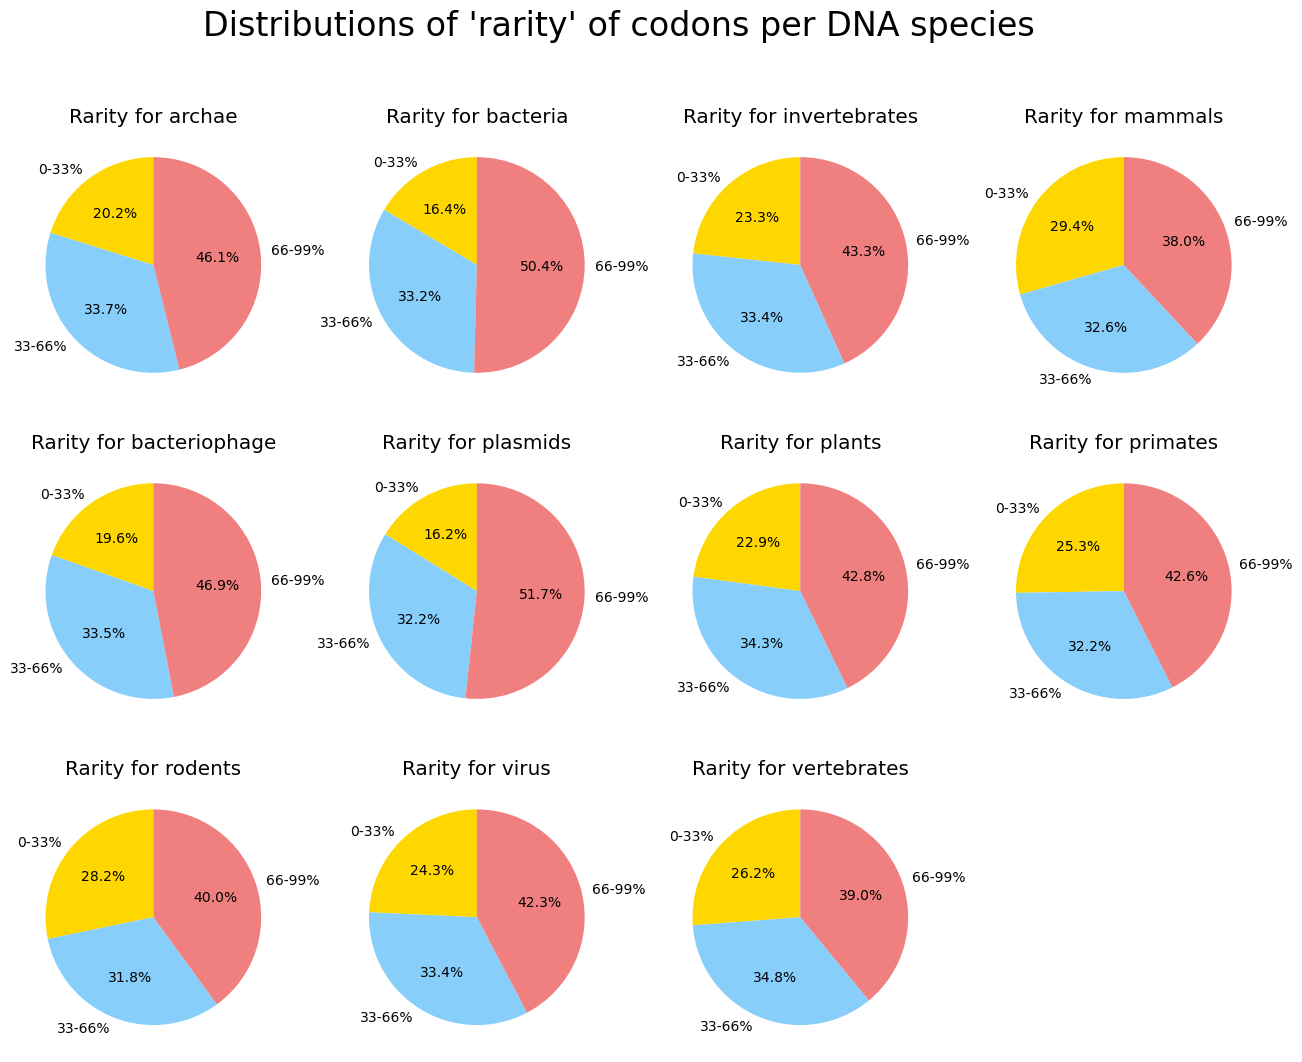

In [15]:
# Plt by species

if run_freqCluster:
    colors = ['gold', 'lightskyblue', 'lightcoral']

    fig,axes = plt.subplots(nrows=3, ncols=4, figsize=(16,12))

    for i, (kingdom, row) in enumerate(freqCluster_df.iterrows()):
        ax = axes[i//4, i % 4]
        ax.pie(row, labels=row.index, autopct='%1.1f%%', colors=colors, startangle=90)
        ax.set_title(f'Rarity for {dict_kingdom[kingdom]}')

    axes[-1,-1].set_visible(False)

    fig.suptitle("Distributions of 'rarity' of codons per DNA species", fontsize=24)

    if run_rarity_plot:
        plot.save('rarity_plot.png',fig.savefig)
    plt.show()

figure saved on  c:\Users\ptons\Code\repositories\codons\reports\amino_plot.png


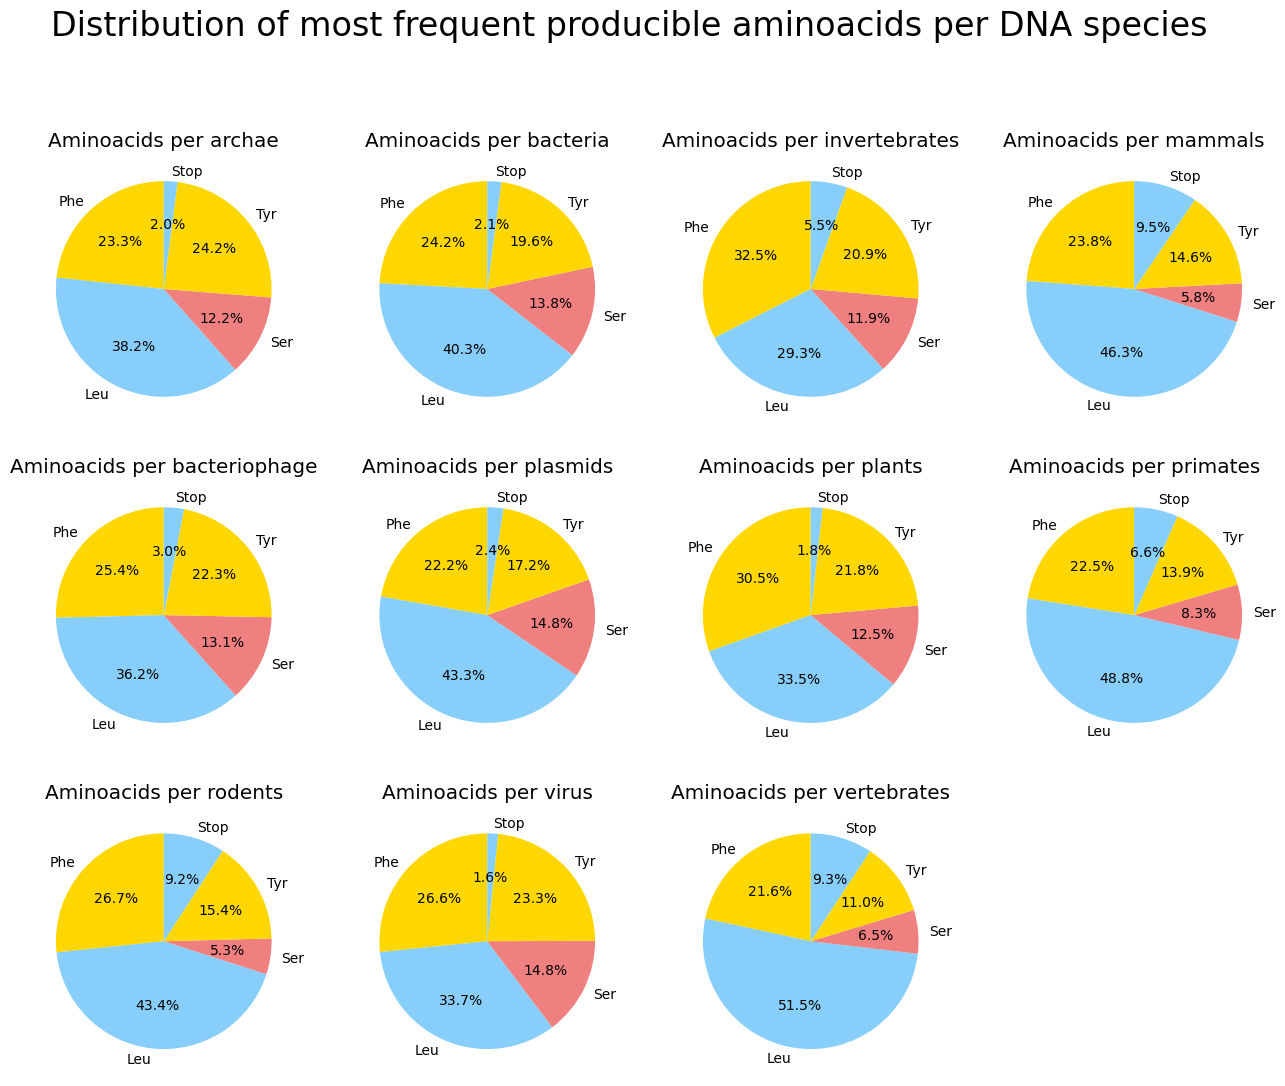

In [16]:

if run_amino_plot:

    prune_factor = 5

    parent = 'data'
    filename = 'amino.csv'

    path = utils.get_path(parent,filename)
    amino_df = pd.read_csv(path, index_col=0)

    amino_df = amino_df.drop(columns="SpeciesName")

    aminos = amino_df.columns[4:]
    prunes = aminos[:prune_factor]

    grouped_df = amino_df.groupby("Kingdom").mean()
    prunned_amino = grouped_df[prunes]
    
    colors = ['gold', 'lightskyblue', 'lightcoral']
    fig,axes = plt.subplots(nrows=3, ncols=4, figsize=(16,12))

    for i, (kingdom, row) in enumerate(prunned_amino.iterrows()):
        if i < len(prunned_amino):
            ax = axes[i//4, i % 4]
            ax.pie(row, labels=row.index, autopct='%1.1f%%', colors=colors, startangle=90)
            ax.set_title(f'Aminoacids per {dict_kingdom[kingdom]}')

    axes[-1, -1].set_visible(False)
    fig.suptitle("Distribution of most frequent producible aminoacids per DNA species", y=1, fontsize=24)

    if run_amino_plot:
        plot.save('amino_plot.png',fig.savefig)
    plt.show()

figure saved on  c:\Users\ptons\Code\repositories\codons\reports\amino_corr


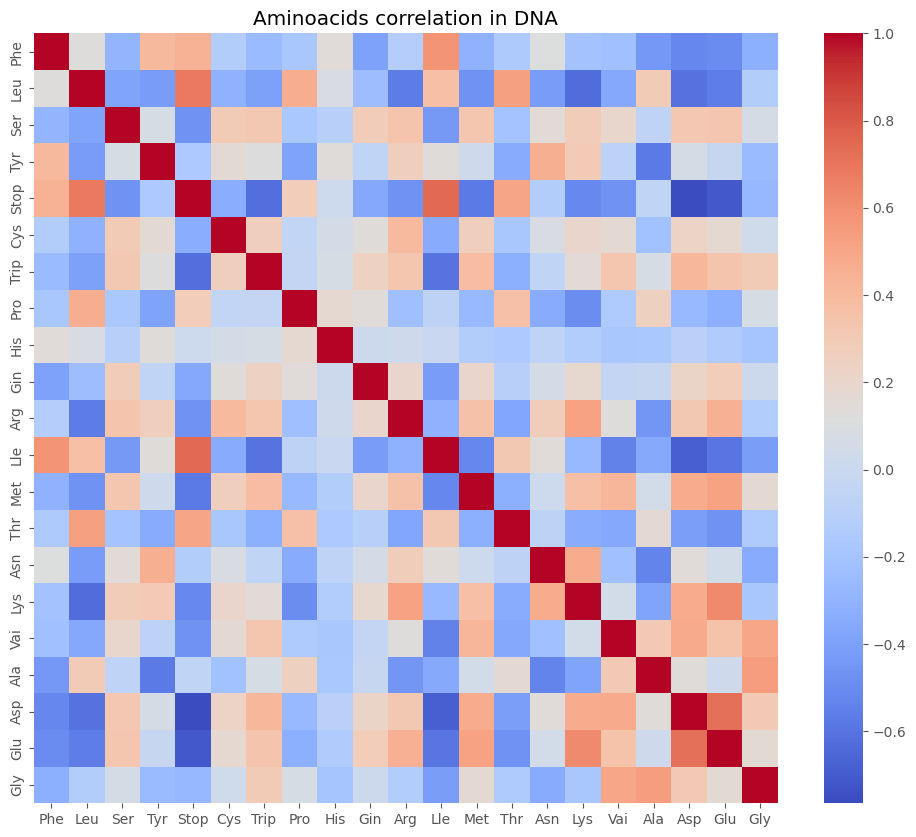

In [17]:
if run_amino_plot:

    correlation_matrix = amino_df[aminos].corr()
    plot.corr_map(correlation_matrix, title="Aminoacids correlation in DNA", savename="amino_corr")
